Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [15]:
import timeit
import random

eps = 1e-16 # This is to create a infinitisimally small gap between the last index in the list to the actual 
            # length of the list - we are taking 1 minus this eps value in the following line.
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3): 
    '''
    This function is to determine the closest approximation to the true median
    by picking the first element, the middle element and the last element and
    choosing the element out of the three that is in the middle in terms of value.
    '''
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    '''
    This function is to sort the list according to the quicksort algorithm.
    '''
    indices = [(0, len(lst))] # Create the list containing a tuple of the first and last indices of the list

    while indices: # Using a while loop to remove the elements in 'indices' and assigning them to the 'frm'
                   # and 'to' variables. This while loop breaks when the 'frm' and 'to' variables are 
                   # non-identical
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition - uses the median function from above to find the optimum partition point
        # As we know, the closer the partition point is to the true median of the list, the better the
        # partition balance.
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split the list into two according to the partition
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Rearrange the numbers to make it in such a way that the numbers larger than the pivot is on the
        # right of the pivot and the nummbers smaller than it are on the left.
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1)) # append the indicies with the tuples from the list with the smaller numbers
        indices.append((ind2, to)) # append the indicies with the tuples from the list with the bigger numbers
    return lst


def randomized_quicksort():
    '''
    This function is to generate a list of random numbers from 1 to N, which in this case, is 10,000.
    The function then performs quicksort of the list and sorts it.
    '''
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    '''
    This function is to test the quicksort and see if it works.
    '''
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

1.0961731639999925


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

The $RANDOMIZED-QUICKSORT$ method in Cormen et al. takes in 3 parameters - $A, p$ and $r$. These parameters stand for the list itself, the first index of the list and the last index of the list. It then partitions it and performs randomized quicksort _recursively_ on the partitioned lists all the way until the entire list is sorted. 

In contrast to that, our `randomized_quicksort` function generates a list of random numbers from 1 to N and then performs quicksort on it. No recursion is involved here.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

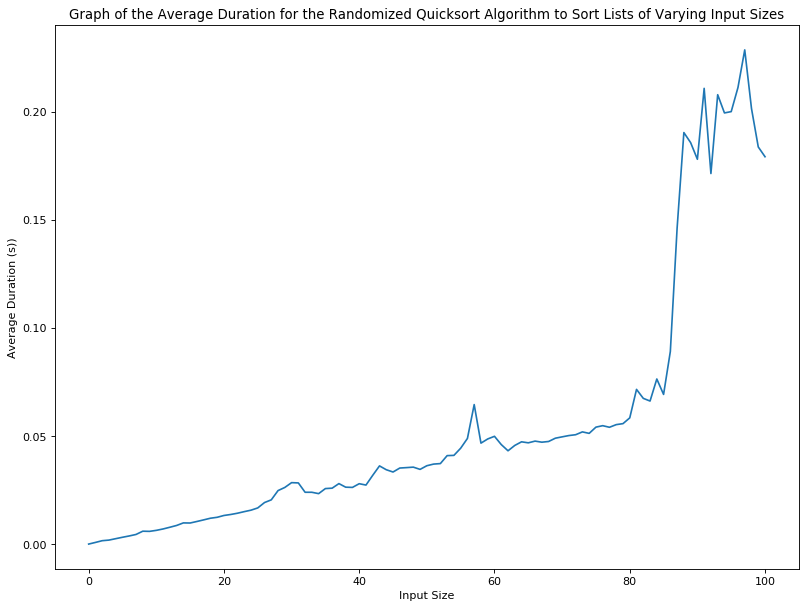

In [32]:
import matplotlib.pyplot as plt

duration_list = []

for N in range(0, 10001, 100):
    duration_list.append((timeit.timeit(randomized_quicksort, number=50))/50)

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0, 10001, 100), duration_list)
plt.xlabel("Input Size")
plt.ylabel("Average Duration (s))")
plt.title("Graph of the Average Duration for the Randomized Quicksort Algorithm to Sort Lists of Varying Input Sizes")
plt.show()

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


I'm not sure why the code for this didn't work - I removed the count term since we're not accounting for duplicates, but I keep getting the same error code of list index being out of range.

In [14]:
# Without duplicate handling

import timeit
import random
import matplotlib.pyplot as plt
import time 

random.seed(123)
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1


def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a <= partition]
        upper = [a for a in lst[frm:to] if a > partition]

        ind1 = frm + len(lower)
        ind2 = ind1 + 1

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct?
test_quicksort()

# How fast is our algorithm?
print(timeit.timeit(randomized_quicksort, number=1))

IndexError: list index out of range

In [11]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

IndexError: list index out of range

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [17]:
# Without median-of-3

import timeit
import random

random.seed(123)
N = 10000

def qsort2(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        partition = lst[frm]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort2():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort2(lst)


def test_quicksort():
    lst = randomized_quicksort2()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct?
test_quicksort()

# How fast is our algorithm?
print(timeit.timeit(randomized_quicksort2, number=1))

0.24720884699991075


In [18]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



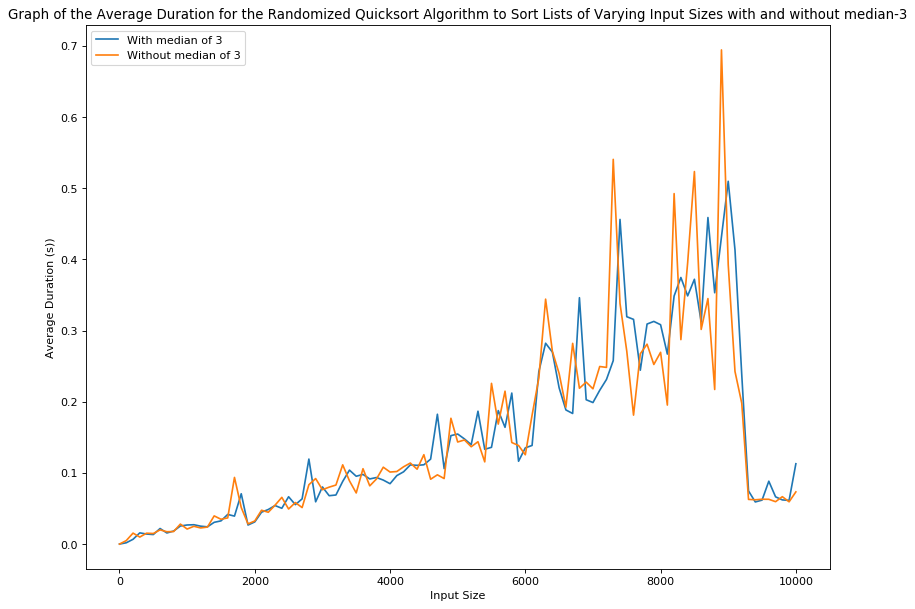

In [20]:
import matplotlib.pyplot as plt

median_list = []
no_median_list = []

for N in range(0, 10001, 100):
    median_list.append((timeit.timeit(randomized_quicksort, number=50))/50)
    no_median_list.append((timeit.timeit(randomized_quicksort2, number=50))/50)

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(0, 10001, 100), median_list, label = "With median of 3")
plt.plot(range(0, 10001, 100), no_median_list, label = "Without median of 3")
plt.xlabel("Input Size")
plt.ylabel("Average Duration (s))")
plt.legend()
plt.title("Graph of the Average Duration for the Randomized Quicksort Algorithm to Sort Lists of Varying Input Sizes with and without median-3")
plt.show()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


By 500 recursive calls, I'm assuming that we'll be able to perform recursive up to 500 levels, where each level will have double the amount of subarrays as the previous one. 

Therefore, if we are doing recursive quicksort with median-of-3, we will be able to fit a dataset of up to $2^{500}$ elements.